In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#CI :
x_m , x_M = -10 , 10  #limites du domaine d'intégration
psi_x_m , psi_x_M = 0 , 0  #valeurs de la fonction d'onde aux limites

#potentiel
V_0 = 5
a = 2
def V (x):
    #square well
    return -V_0/2*(1-np.sign(np.abs(x)-a))

#params d'intégration
dx = 0.01
eps = 0.0000001



# Numerov droite-gauche

In [3]:
def numerov(psi_range,x_range,V,E,direction):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    direction -> 1 = gauche/droite  -1=droite/gauche"""
    
    #création de variables utiles
    Q = lambda x : 2*(E-V(x))
    h = x_range[1]-x_range[0]  
    psi_out = psi_range.copy()
    
    #réalisation de l'intégration de Numerov
    if direction == 1 :
        for i in range(2,len(psi_range)):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i-1]))*psi_out[i-1]-(1+1/12*h**2*Q(x_range[i-2]))*psi_out[i-2])/(1+1/12*h**2*Q(x_range[i]))
    if direction == -1 :
        for i in range(len(psi_range)-3,-1,-1):
            psi_out[i] = (2*(1-5/12*h**2*Q(x_range[i+1]))*psi_out[i+1]-(1+1/12*h**2*Q(x_range[i+2]))*psi_out[i+2])/(1+1/12*h**2*Q(x_range[i]))
    
    return psi_out

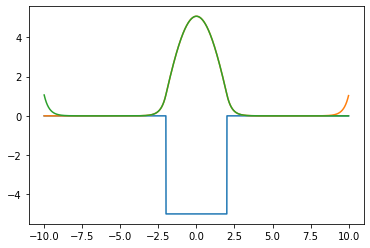

In [4]:
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))

psi_range = np.zeros(int((x_M-x_m)/dx))
#mise en place des conditions aux bords
psi_range[0] = psi_x_m
psi_range[1] = psi_x_m + eps
psi_range[-1] = psi_x_M
psi_range[-2] = psi_x_M + eps

#variables pour l'affichage
temp = -1
normalisation = 80000

#plot le potentiel
plt.plot(x_range[0:temp],V(x_range[0:temp]))

#E = -2.9786753325
E = - 4.770734932405

#plot l'intégration de gauche à droite
out = numerov(psi_range,x_range,V,E,1)
plt.plot(x_range[0:temp],out[0:temp]/normalisation)

#plot l'intégration de droite à gauche
out_2 = numerov(psi_range,x_range,V,E,-1)
plt.plot(x_range[0:temp],out_2[0:temp]/normalisation)

# Check de la dérivée logarithmique au mid-point

In [321]:
def Do_mid_point (psi_range,x_range,V,E,N_x_c):
    """psi_range = array contenant les psi_i avec les valeurs aux bords déjà mises en place 
    x_range = array contenant les x
    V = fonction jouant le role de potentiel
    E = energie à tester
    N_x_c = indice du mid-point"""
    
    h = x_range[1]-x_range[0]
    
    #découpage des ranges au mid-point
    x_left = x_range.copy()[0:N_x_c+1]
    x_right = x_range.copy()[N_x_c:] 
    
    psi_left = psi_range.copy()[0:N_x_c+1]
    psi_right = psi_range.copy()[N_x_c:]
    
    
    #réalisation des intégrations de numerov
    psi_left = numerov(psi_left,x_left,V,E,1)
    psi_right = numerov(psi_right,x_right,V,E,-1)
    
    #raccordement des deux morceaux :
    psi_out = np.concatenate((psi_left[0:-1],psi_right*(psi_left[-1]/psi_right[0])))
    
    #évaluation de l'erreur du raccord en x_c
    log_error = (psi_left[-1]-psi_left[-2])/(psi_left[-1]*h) - (psi_right[1]-psi_right[0])/(psi_right[0]*h)

    N = 0
    
    for i in range(1,len(psi_out)) :
        if (psi_out[i]*psi_out[i-1] < 0):
            N += 1
    
    return log_error, N , psi_out

log_error : 0.04044535443988203  N :  2


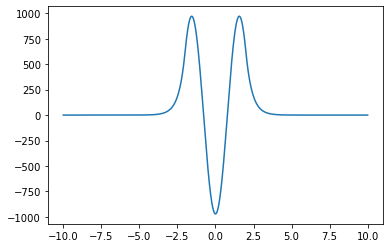

In [324]:
x_range = np.linspace(x_m,x_M,int((x_M-x_m)/dx))

psi_range = np.zeros(int((x_M-x_m)/dx))
psi_range[0] = psi_x_m
psi_range[1] = psi_x_m + eps
psi_range[-1] = psi_x_M
psi_range[-2] = psi_x_M + eps

N_x_c = int(len(psi_range)/2)
E = -2.9786753325
#E = - 4.770734932405
log_error , N , psi_out = Do_mid_point(psi_range,x_range,V,E,N_x_c)
print("log_error :" ,log_error," N : ",N)
plt.plot(x_range,psi_out)